In [1]:
import uproot as uproot
import numpy as np
import awkward as ak
print(uproot.__version__)
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.special import exp10
print(mpl.__version__)
import sys
sys.path.append("/home/amisery/Analysis_mlcut")

from utils import return_cuts, read_folder, plot_sig_bg_2d_comp, plot_2d_tp_tn_fp_fn, print_sel_comp

4.3.7
3.6.2


In [2]:
# font = {
#         'weight' : 'normal',
#         'size'   : 28}
# rcparams = {
#     "mathtext.default": "regular",
#     "figure.figsize": (8.0, 8.0),
#     "font.size": 24,
#     "axes.labelsize": "medium",
#     "axes.unicode_minus": False,
#     "xtick.labelsize": "small",
#     "ytick.labelsize": "small",
#     "legend.fontsize": "small",
#     "legend.handlelength": 1.5,
#     "legend.borderpad": 0.5,
#     "legend.frameon": False,
#     "xtick.direction": "in",
#     "xtick.major.size": 12,
#     "xtick.minor.size": 6,
#     "xtick.major.pad": 6,
#     "xtick.top": True,
#     "xtick.major.top": True,
#     "xtick.major.bottom": True,
#     "xtick.minor.top": True,
#     "xtick.minor.bottom": True,
#     "xtick.minor.visible": True,
#     "ytick.direction": "in",
#     "ytick.major.size": 12,
#     "ytick.minor.size": 6.0,
#     "ytick.right": True,
#     "ytick.major.left": True,
#     "ytick.major.right": True,
#     "ytick.minor.left": True,
#     "ytick.minor.right": True,
#     "ytick.minor.visible": True,
#     "grid.alpha": 0.8,
#     "grid.linestyle": ":",
#     "axes.linewidth": 2,
#     "savefig.transparent": False,
#     "xaxis.labellocation": "right",
#     "yaxis.labellocation": "top",
# }
# for key in list(rcparams.keys()):
#     mpl.rcParams[key] = rcparams[key]
    
# # matplotlib.rc('font', **font)
# # matplotlib.rcParams['figure.figsize'] = (12, 9)
# # matplotlib.rcParams["figure.autolayout"] = True

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
df = read_folder(fpath = "/home/amisery/Analysis/RecoAnalysis/outputs/data/data_all_precut_newcond/")
df_l = read_folder(fpath = "/home/amisery/Analysis/RecoAnalysis/outputs/data/data_all_precut_likelihood/")

In [5]:
latex_legends = [r'True $\nu_{e}~CC0\pi$', r"True entering $\gamma$", r'True NC $\gamma$', r'True NC $\pi^0$',  r'True NC $~$', r'True $\nu_{\mu, ws}$', r'True $\nu_{\mu}$', r'True $\nu_{e}~CC~other$', r'True $\nu_{e, ws}$', "other"]


In [6]:
# 1 - Basic data statistics

In [7]:
base_cut = (df["dwall"]>100)  & (df["reconring"] == 1)
df_base = df[base_cut]

True $\nu_{e}~CC0\pi$
True NC $\gamma$
True NC $\pi^0$
True NC $~$
True $\nu_{\mu}$
True $\nu_{e}~CC~other$
True $\nu_{e, ws}$


<BarContainer object of 7 artists>

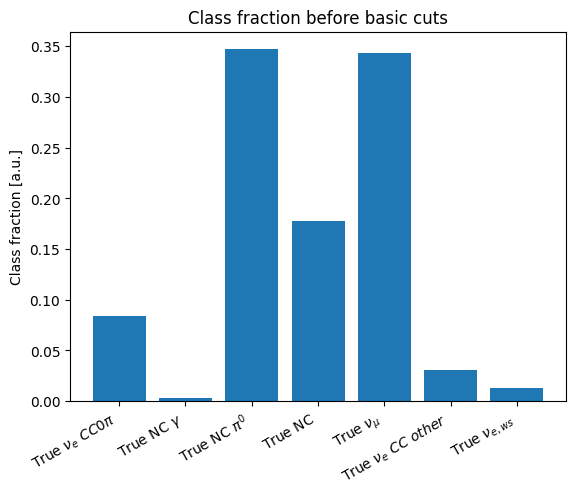

In [8]:
label_list = [0,2,3,4,6,7,8]
latex_legends = [r'True $\nu_{e}~CC0\pi$', r"True entering $\gamma$", r'True NC $\gamma$', r'True NC $\pi^0$',  r'True NC $~$', r'True $\nu_{\mu, ws}$', r'True $\nu_{\mu}$', r'True $\nu_{e}~CC~other$', r'True $\nu_{e, ws}$', "other"]
for i in label_list :
    print(latex_legends[i])
names = [latex_legends[i] for i in label_list]
counts = [len(df.loc[df["reac"]==i])/len(df) for i in label_list]
plt.xticks(rotation=30, ha='right')
plt.title("Class fraction before basic cuts")
plt.ylabel("Class fraction [a.u.]")
plt.bar(names, counts)

<BarContainer object of 7 artists>

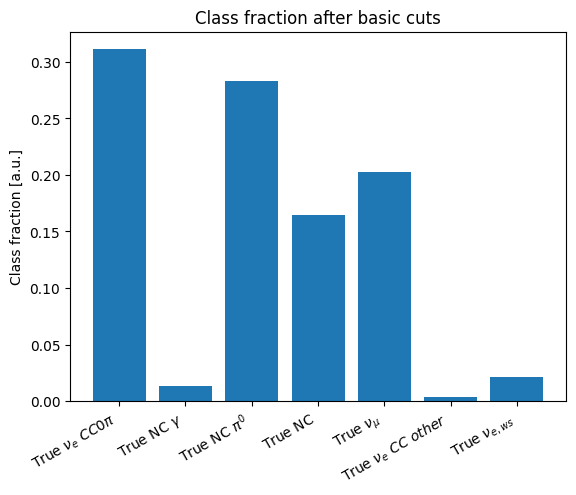

In [9]:
label_list = [0,2,3,4,6,7,8]
names = [latex_legends[i] for i in label_list]
counts = [len(df_base.loc[df_base["reac"]==i])/len(df_base) for i in label_list]
plt.xticks(rotation=30, ha='right')
plt.title("Class fraction after basic cuts")
plt.ylabel("Class fraction [a.u.]")
plt.bar(names, counts)

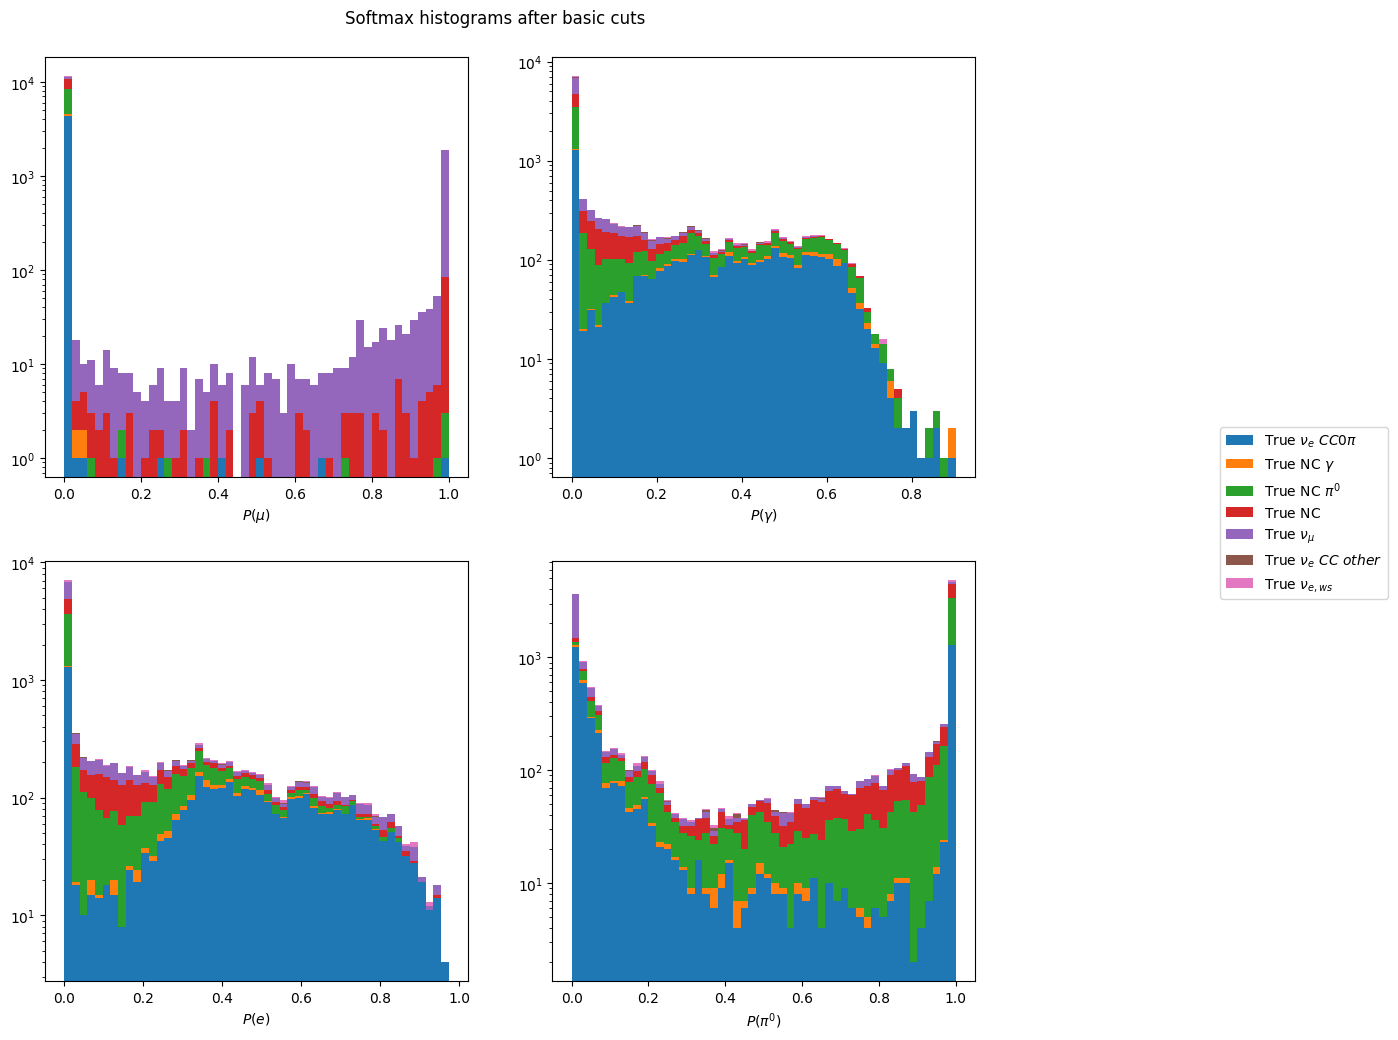

In [10]:
names = ["pmu", "pe", "pgamma", "ppi0"]
legends = [r'$P(\mu)$', r'$P(e)$', r"$P(\gamma)$", r"$P(\pi^0)$"]
fig, axs = plt.subplots(2,2, figsize = (12,12))
for j in range(2):
    for k in range(2):
        axs[j,k].hist([df_base[df_base["reac"]==i][names[j+2*k]] for i in label_list], histtype = "barstacked", label = [latex_legends[i] for i in label_list], bins = 50)

        axs[j,k].set_xlabel(legends[j+ 2*k])
        axs[j,k].set_yscale("log")
        
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor = (1.25,0.5))
fig.suptitle("Softmax histograms after basic cuts", y = 0.92)
plt.show()

# 2 - Softmax cuts by eye

We will succesively determine the "optimal" cuts on 2d spaces of softmax probabilities and reconstructed lepton momentum or reconstructed $\pi^0$ mass.

### We first make the muon cut on the whole dataset :

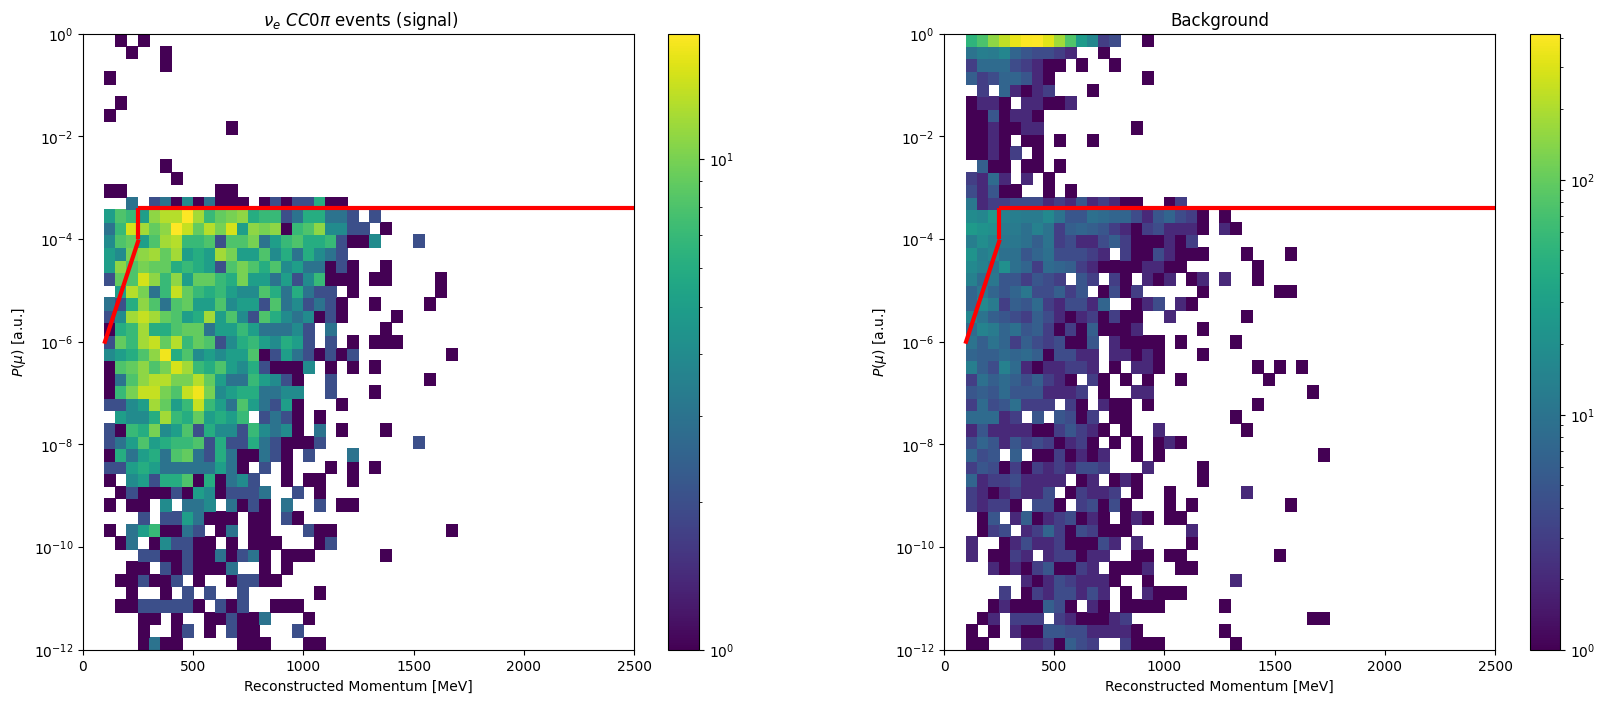

In [48]:
fig, axes = plot_sig_bg_2d_comp(df_base, "mom", "pmu", xlim = (0,2500), ylim = (1e-12,1), binnum_x = 50, logbin_y = True, xname = r"Reconstructed Momentum [MeV]", yname = r"$P(\mu)$ [a.u.]")
x = np.linspace(100,250, 100)
y = 10**((x-100)/200*(6 + np.log10(0.0004)) + -6)
axes[0].plot(x,y, color = "red", linewidth =3 )
axes[0].hlines(0.0004, 250, 2500, colors='red', linewidth=3, label='test')
axes[0].vlines(250, 0.0001, 0.0004, colors='red', linewidth=3, label='test')

axes[1].plot(x,y, color = "red", linewidth =3 )
axes[1].hlines(0.0004, 250, 2500, colors='red', linewidth=3, label='test')
axes[1].vlines(250, 0.0001, 0.0004, colors='red', linewidth=3, label='test')


In [12]:
pmu_cut = ((df_base["pmu"]<0.0004) & (df_base["mom"]>300)) | ((df_base["pmu"]< 10**((df_base["mom"]-100)/200*(6+np.log10(0.0004)) - 6)) & (df_base["mom"] <= 300))

df_pmu = df_base[pmu_cut]

### Then, we can look at the 2D histograms with $\pi^0$ softmax and $\pi^0$ mass or reconstructed lepton momentum

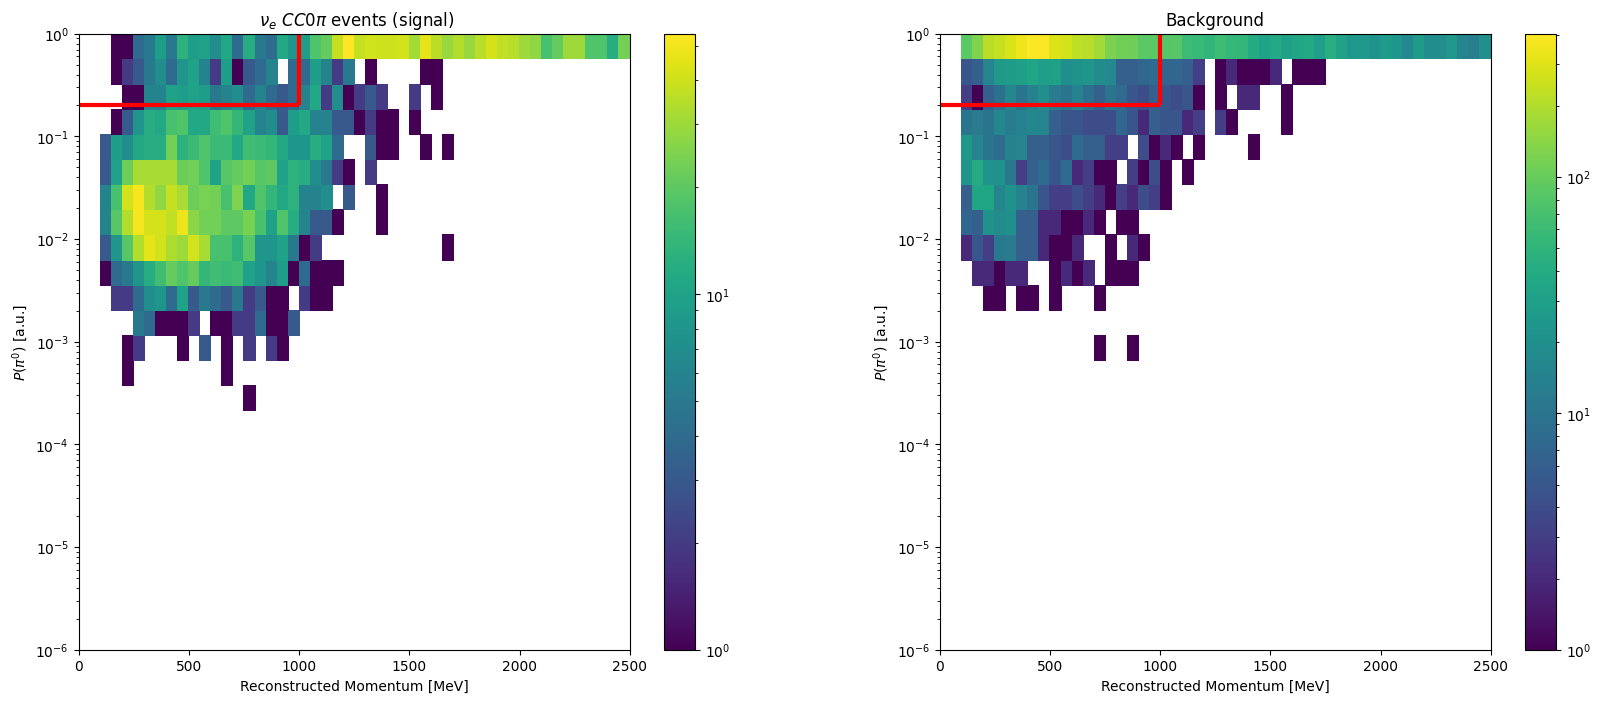

<Figure size 640x480 with 0 Axes>

In [44]:
fig, axes = plot_sig_bg_2d_comp(df_pmu, "mom", "ppi0",xlim = (0,2500), ylim = (1e-6,1), logbin_y = True, xname = r"Reconstructed Momentum [MeV]", binnum_x = 50, yname = r"$P(\pi^0)$ [a.u.]")

axes[0].hlines(0.2, 0, 1000, colors='red', linewidth=3, label='test')
axes[0].vlines(1000, 0.2, 1, colors='red', linewidth=3, label='test')

axes[1].hlines(0.2, 0, 1000, colors='red', linewidth=3, label='test')
axes[1].vlines(1000, 0.2, 1, colors='red', linewidth=3, label='test')

plt.show()
plt.clf()

we can cut following this : $P(\pi^0)<0.2$ and keep the cut under the 1GeV momentum range

In [14]:
pi0_cut = ((df_pmu["ppi0"]<0.5) & (df_pmu["mom"]<=1000)) | (df_pmu["mom"]>1000)
df_pi0 = df_pmu[pi0_cut]

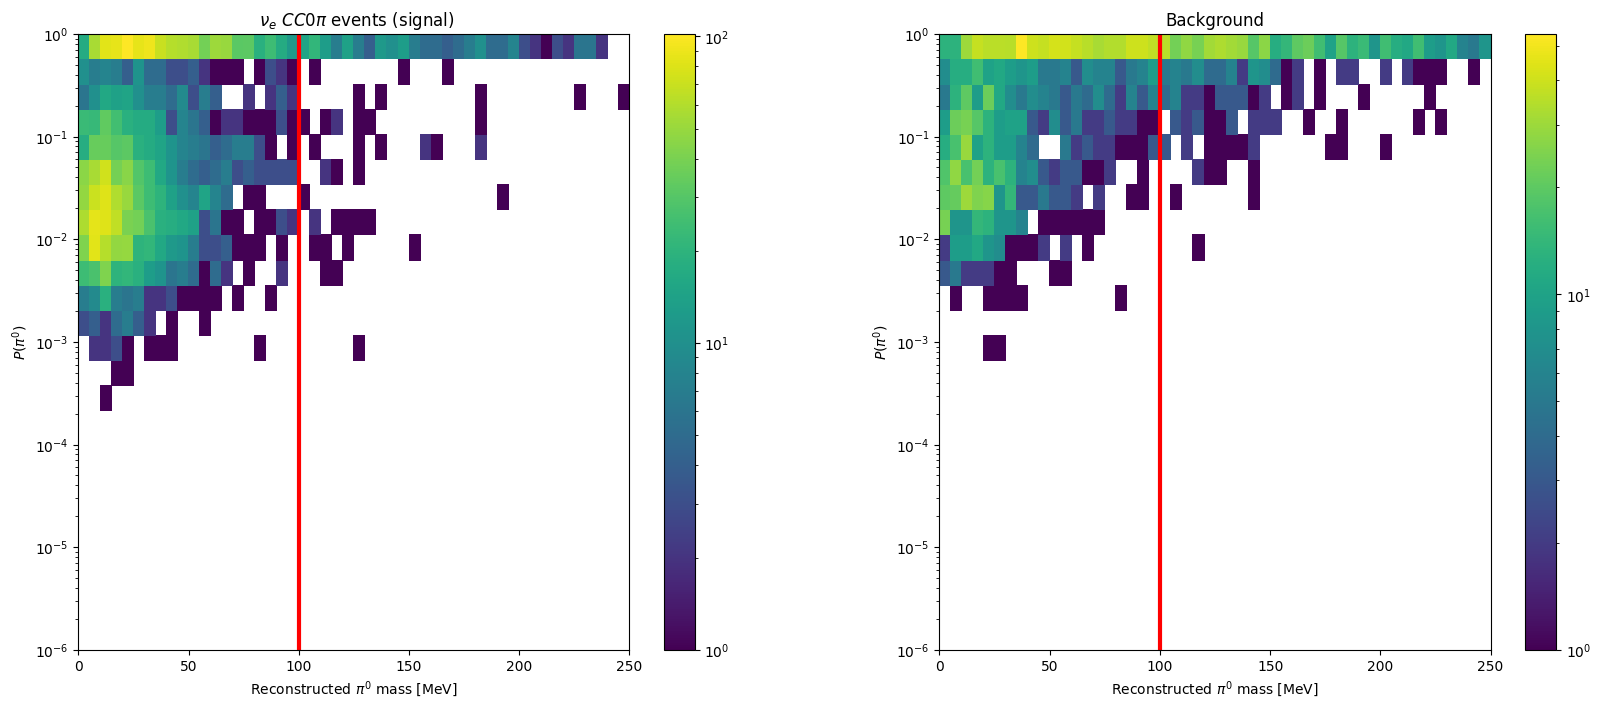

<Figure size 640x480 with 0 Axes>

In [50]:
fig, axes = plot_sig_bg_2d_comp(df_pi0, "pi0mass", "ppi0", xlim = (0,250), ylim = (1e-6,1), logbin_y = True, binnum_x = 50, xname = r"Reconstructed $\pi^0$ mass [MeV]", yname = r"$P(\pi^0)$")


axes[0].vlines(100, 0, 1, colors='red', linewidth=3, label='test')

axes[1].vlines(100, 0, 1, colors='red', linewidth=3, label='test')

plt.show()
plt.clf()

We can add a cut on $\pi^0$ masses greater than 100MeV

In [16]:
pi0_mass_cut = df_pi0["pi0mass"]<100
df_mass = df_pi0[pi0_mass_cut]

### Then let's plot the 2D histogram with $P(e^-)$ and the reconstructed lepton momentum : 

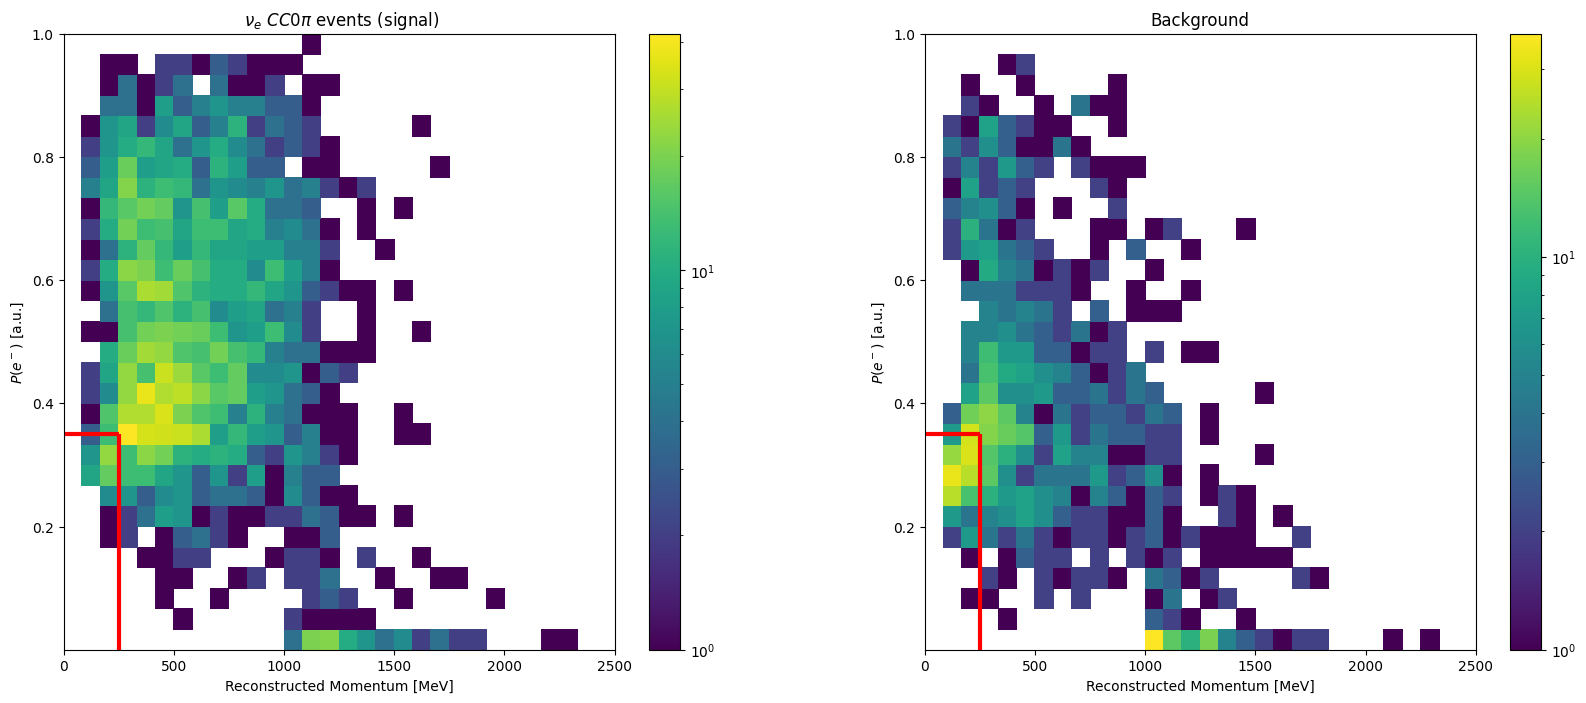

In [51]:
fig, axes = plot_sig_bg_2d_comp(df_mass, "mom", "pe", xlim = (0,2500), ylim = (1e-6,1), logbin_y = False, binnum_y = 30, binnum_x = 30, xname = r"Reconstructed Momentum [MeV]", yname = r"$P(e^-)$ [a.u.]")

axes[0].hlines(0.35, 0, 250, colors='red', linewidth=3, label='test')
axes[0].vlines(250, 0, 0.35, colors='red', linewidth=3, label='test')

axes[1].hlines(0.35, 0, 250, colors='red', linewidth=3, label='test')
axes[1].vlines(250, 0, 0.35, colors='red', linewidth=3, label='test')

We can remove the backgroud at low momentum and low electron probability :

In [18]:
pe_cut = ((df_mass["pe"]>0.35) & (df_mass["mom"]<250)) | (df_mass["mom"]>=250)
df_pe = df_mass[pe_cut]

We can plot some 2D hist again to see the difference

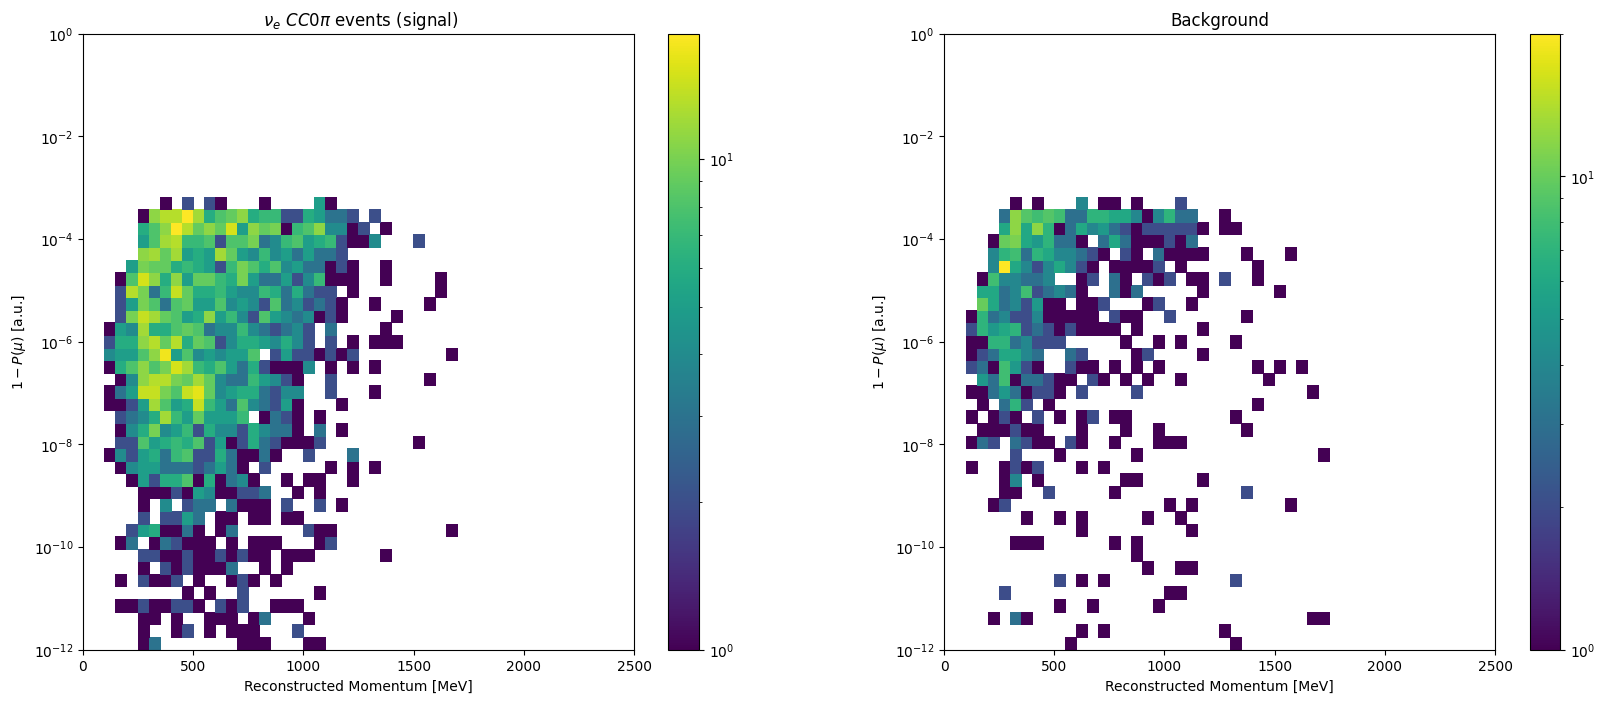

<Figure size 640x480 with 0 Axes>

In [52]:
fig, axes = plot_sig_bg_2d_comp(df_pe, "mom", "pmu", logbin_y = True, xlim = (0,2500), ylim = (1e-12,1), binnum_y = 50, binnum_x = 50, xname = r"Reconstructed Momentum [MeV]", yname = r"$1 -P(\mu)$ [a.u.]")

plt.show()
plt.clf()

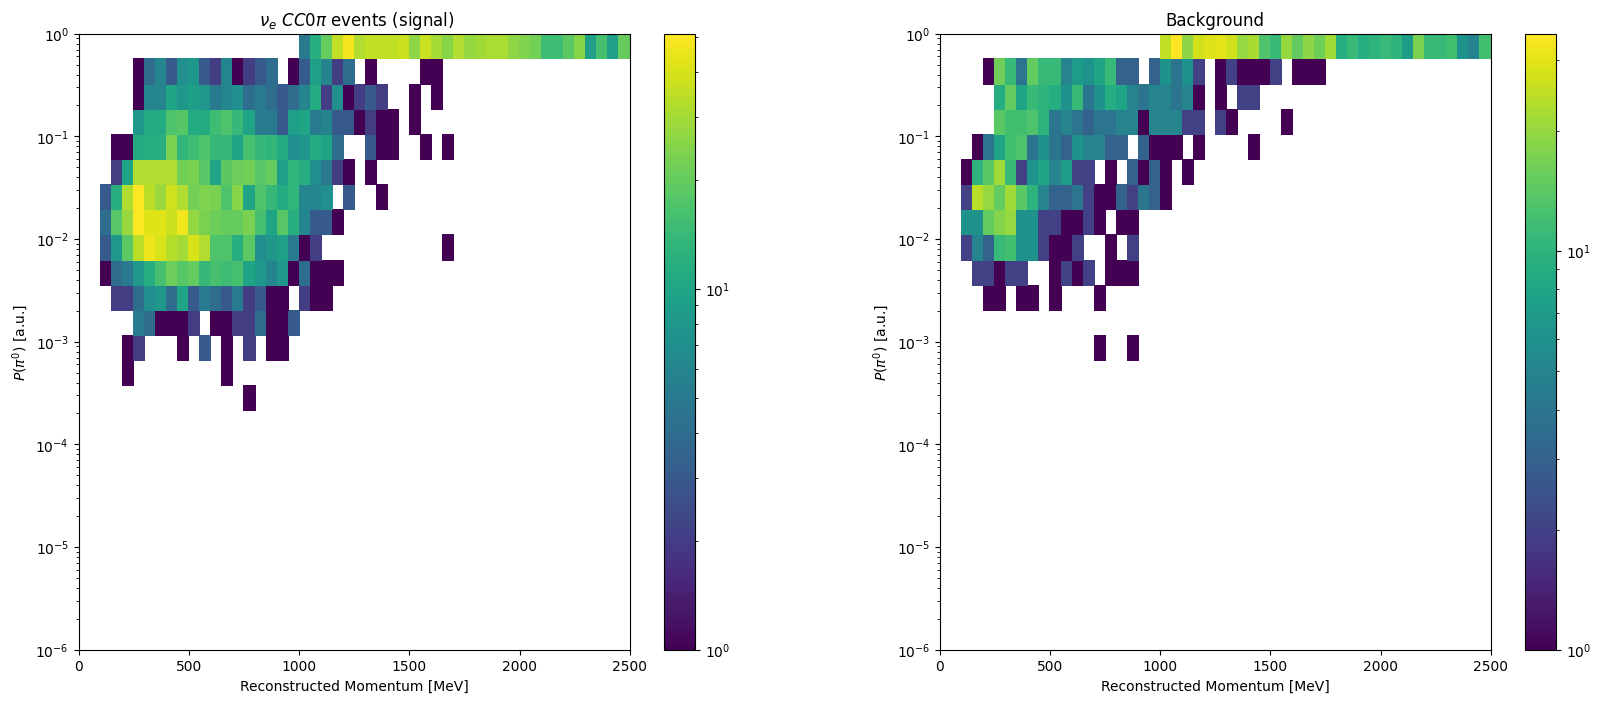

In [53]:
fig, axes = plot_sig_bg_2d_comp(df_pe, "mom", "ppi0", xlim = (0,2500), ylim = (1e-6,1), binnum_y = 50, binnum_x = 50, logbin_y = True, xname = r"Reconstructed Momentum [MeV]", yname = r"$P(\pi^0)$ [a.u.]")

### Let's combine all the cuts and compare with FitQun : 
We can do two different ways, either only using $P(\mu)$ and $P(e^-)$ cut combined with the $\pi^0$ FitQun cut or either using only ML cuts. The cuts are all encapsulated inside the return_cuts function in the utils script

In [21]:
pmu_cut, pi0_cut, pe_cut, pi0_fitqun_cut = return_cuts(df_base)
df_base["sig_mixed"] = pmu_cut & pe_cut & pi0_fitqun_cut
df_base["sig_ml"] = pmu_cut & pe_cut & pi0_cut

/tmp/ipykernel_22272/2690805618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base["sig_mixed"] = pmu_cut & pe_cut & pi0_fitqun_cut
/tmp/ipykernel_22272/2690805618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base["sig_ml"] = pmu_cut & pe_cut & pi0_cut


/home/amisery/Analysis_mlcut/utils.py:240: RuntimeWarning: invalid value encountered in true_divide
  print(histo1/histo2)
/home/amisery/Analysis_mlcut/utils.py:245: RuntimeWarning: invalid value encountered in long_scalars
  vals_y = np.concatenate((vals_y,np.array([histo1[j]/histo2[j] for i in range(10)])))


[0.95495495 1.         1.                nan        nan]
[1.25301205 0.13559322 1.                nan        nan]
[0.66666667 1.         1.         1.         1.        ]
[0.90909091 0.97777778 1.         1.         1.        ]


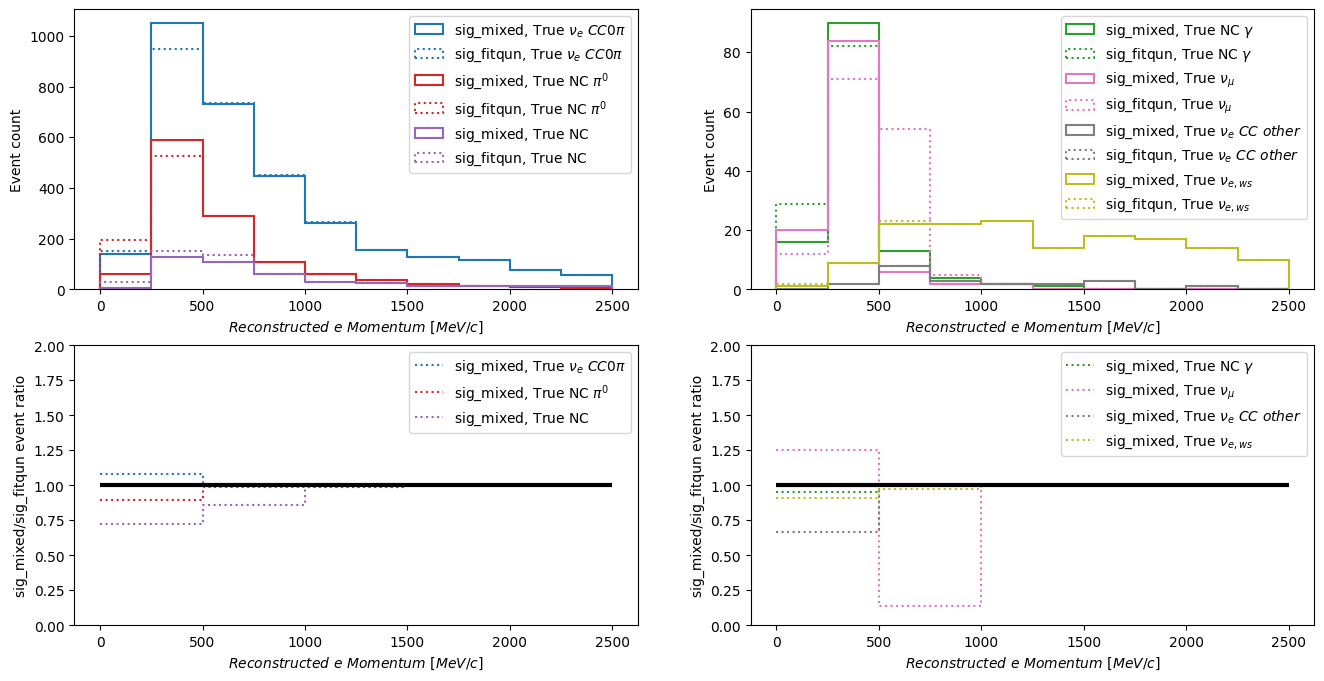

<Figure size 640x480 with 0 Axes>

{'True $\\nu_{e}~CC0\\pi$': [1.0238313473877176],
 'True NC $\\pi^0$': [0.9367283950617284],
 'True NC $~$': [0.8584392014519057],
 'True NC $\\gamma$': [0.9618320610687023],
 'True $\\nu_{\\mu}$': [0.7916666666666666],
 'True $\\nu_{e}~CC~other$': [0.9545454545454546],
 'True $\\nu_{e, ws}$': [0.9897435897435898]}

<Figure size 640x480 with 0 Axes>

In [55]:
print_sel_comp(df_base, "sig_mixed", "sig_fitqun")

[1.15217391 1.30769231 1.                nan        nan]
[1.25301205        inf 0.5        0.         0.        ]
[1.  1.1 0.4 1.  0.5]
[1.11111111 1.04761905 0.77083333 0.72916667 0.8       ]


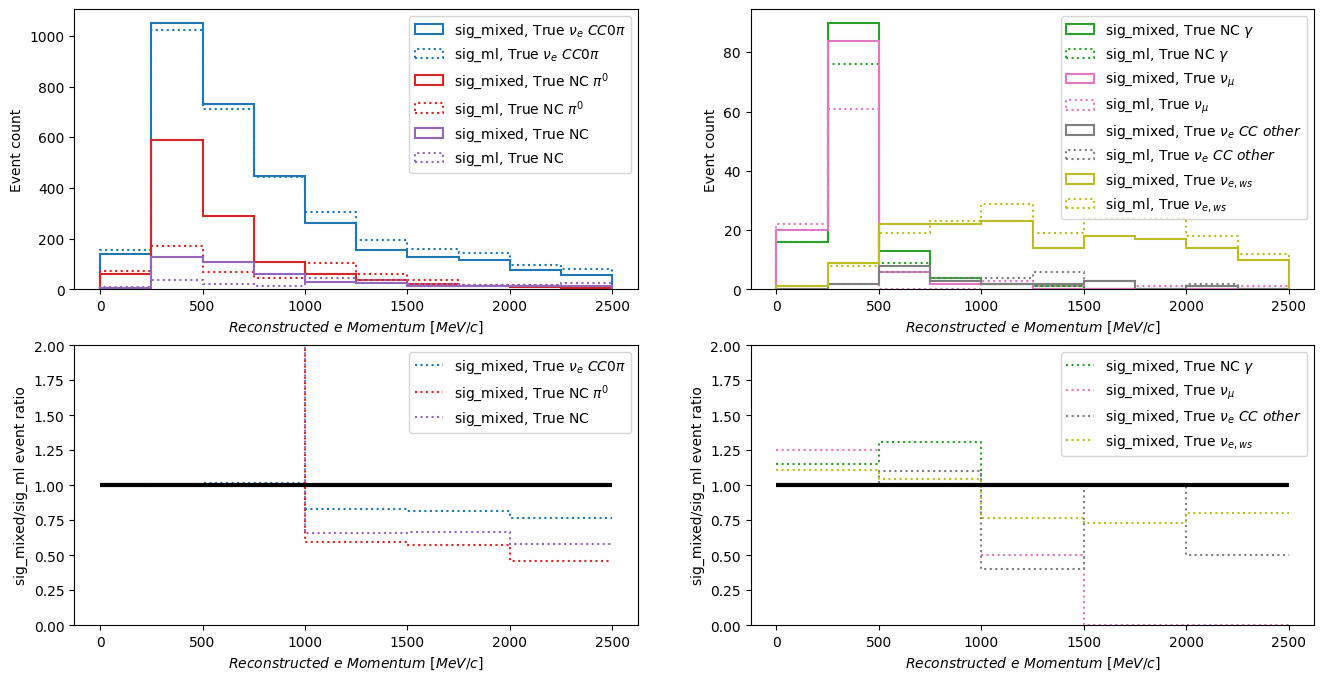

<Figure size 640x480 with 0 Axes>

({'True $\\nu_{e}~CC0\\pi$': [0.9331662489557226],
  'True NC $\\pi^0$': [1.873456790123457],
  'True NC $~$': [1.295890410958904],
  'True NC $\\gamma$': [1.1666666666666667],
  'True $\\nu_{\\mu}$': [1.2666666666666666],
  'True $\\nu_{e}~CC~other$': [0.7777777777777778],
  'True $\\nu_{e, ws}$': [0.8212765957446808]},
 {'True $\\nu_{e}~CC0\\pi$': [3351, 3591],
  'True NC $\\pi^0$': [1214, 648],
  'True NC $~$': [473, 365],
  'True NC $\\gamma$': [126, 108],
  'True $\\nu_{\\mu}$': [114, 90],
  'True $\\nu_{e}~CC~other$': [21, 27],
  'True $\\nu_{e, ws}$': [193, 235]})

<Figure size 640x480 with 0 Axes>

In [59]:
print_sel_comp(df_base, "sig_mixed", "sig_ml")

/home/amisery/Analysis_mlcut/utils.py:240: RuntimeWarning: invalid value encountered in true_divide
  print(histo1/histo2)
/home/amisery/Analysis_mlcut/utils.py:245: RuntimeWarning: invalid value encountered in long_scalars
  vals_y = np.concatenate((vals_y,np.array([histo1[j]/histo2[j] for i in range(10)])))
/home/amisery/Analysis_mlcut/utils.py:240: RuntimeWarning: divide by zero encountered in true_divide
  print(histo1/histo2)
/home/amisery/Analysis_mlcut/utils.py:245: RuntimeWarning: divide by zero encountered in long_scalars
  vals_y = np.concatenate((vals_y,np.array([histo1[j]/histo2[j] for i in range(10)])))


[0.82882883 0.76470588 1.                nan        nan]
[ 1.  0.  2. inf inf]
[0.66666667 0.90909091 2.5        1.         2.        ]
[0.81818182 0.93333333 1.2972973  1.37142857 1.25      ]


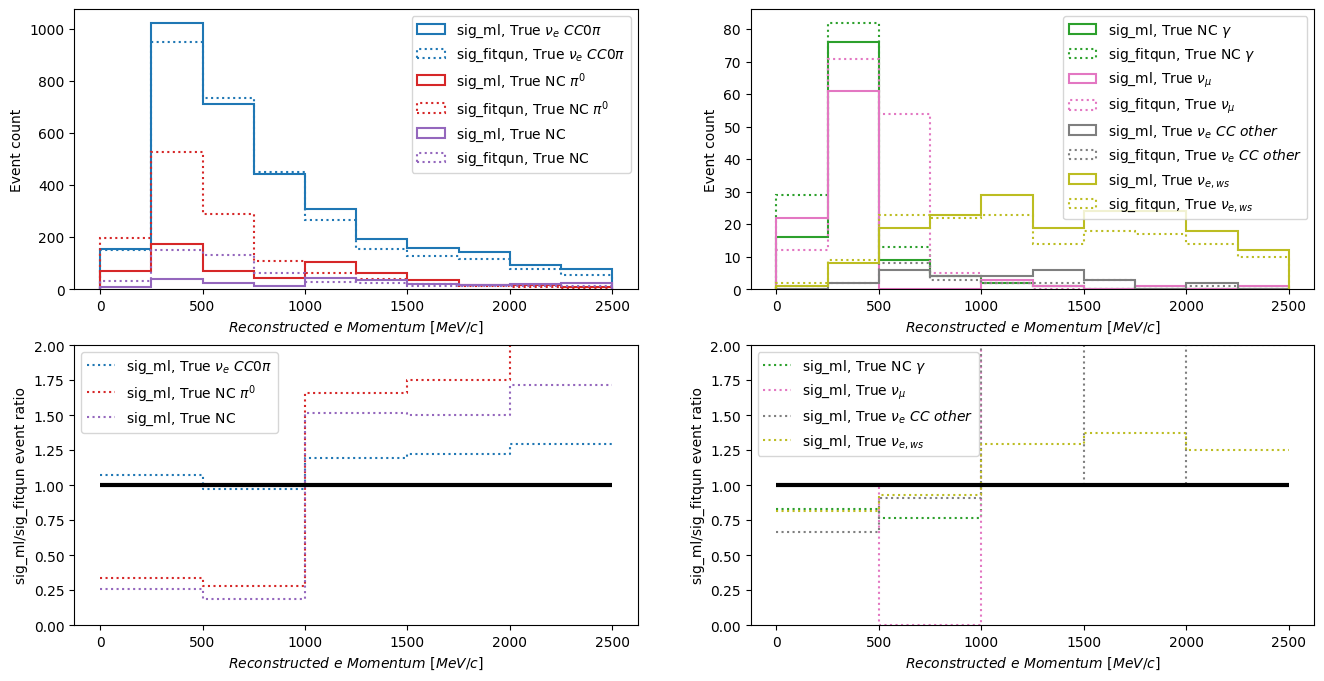

<Figure size 640x480 with 0 Axes>

({'True $\\nu_{e}~CC0\\pi$': [1.0971585701191566],
  'True NC $\\pi^0$': [0.5],
  'True NC $~$': [0.662431941923775],
  'True NC $\\gamma$': [0.8244274809160306],
  'True $\\nu_{\\mu}$': [0.625],
  'True $\\nu_{e}~CC~other$': [1.2272727272727273],
  'True $\\nu_{e, ws}$': [1.205128205128205]},
 {'True $\\nu_{e}~CC0\\pi$': [3591, 3273],
  'True NC $\\pi^0$': [648, 1296],
  'True NC $~$': [365, 551],
  'True NC $\\gamma$': [108, 131],
  'True $\\nu_{\\mu}$': [90, 144],
  'True $\\nu_{e}~CC~other$': [27, 22],
  'True $\\nu_{e, ws}$': [235, 195]})

<Figure size 640x480 with 0 Axes>

In [58]:
print_sel_comp(df_base, "sig_ml", "sig_fitqun")

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_bis["sig"],df_bis["base_sel"])

NameError: name 'df_bis' is not defined

In [ ]:
def plot_stats(df, sel_name = "Sample"):
#     Plot multiplot containing main info about the content of the dataset
    fig, axes = plt.subplots(2,2, figsize = (12,10))
    
    sig_cut = (df["sig"] == 1.0)
    bg_cut = (df["sig"] == 0.0)
    df_sig = df.loc[sig_cut]
    df_bg = df.loc[bg_cut]
    axes[0,0].hist([df_bg["mom"], df_sig["mom"]], range = (0,2500),histtype = 'barstacked',  bins = 50)
    axes[0,0].set_title("Momentum", fontsize = 12)
    axes[0,0].set_xlabel("Reconstructed Lepton Momentum [GeV]", fontsize = 12)
    
    axes[0,1].hist([df_bg["trueoaa"], df_sig["trueoaa"]], histtype = 'barstacked', bins = 50)
    axes[0,1].set_title("True OAA", fontsize = 12)
    axes[0,1].set_xlabel("OAA [°]", fontsize = 12)
    
    axes[1,0].hist([df_bg["dwall"], df_sig["dwall"]], range = (0,400), histtype = 'barstacked', bins = 50)
    axes[1,0].set_title("Distance from wall", fontsize = 12)
    axes[1,0].set_xlabel("Distance from wall [cm]", fontsize = 12)
    
    axes[1,1].hist([df_bg["towall"], df_bg["towall"]], range = (0,1000),histtype = 'barstacked',  bins = 50)
    axes[1,1].set_title("Distance to wall", fontsize = 12)
    axes[1,1].set_xlabel("Distance to wall [cm]", fontsize = 12)
    fig.tight_layout(pad = 1)
    fig.suptitle("%s statistics, number of events : %d"%(sel_name, len(df)), fontsize = 18)
    plt.show()

In [ ]:
plot_stats(df_sel)

In [ ]:
plot_stats(df_sel)

In [ ]:
df_sel = df[(df["pi0mass"] <50) & (df["dwall"]>100)]